### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Master Query from Database

In [ ]:
# connect to DB and query data needed for modeling

### Load in Dataframes

In [23]:
documents_table= pd.read_csv('documents_table.csv')
documents_table.head()
documents_table.dtypes

doc_id                              int64
doc_type                           object
year                                int64
drug                               object
drug administration error           int64
                                    ...  
eosinophil percentage decreased     int64
supraventricular tachycardia        int64
radiation skin injury               int64
hypokalaemia                        int64
all_reactions                      object
Length: 929, dtype: object

### Investigate most common drugs, referenced in historical documents

#### insights
* need to remove some values like air, body, oxygen

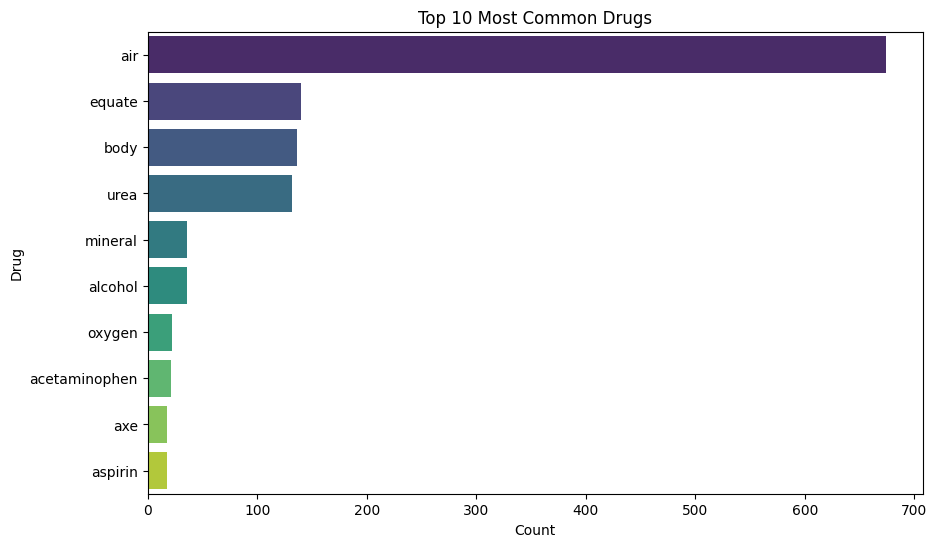

In [19]:
top_drugs = documents_table['drug'].value_counts().head(10)
top_drugs = top_drugs.reset_index().rename(columns={'index': 'drug', 'drug': 'count'})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='drug', data=top_drugs, palette='viridis')
plt.title('Top 10 Most Common Drugs')
plt.xlabel('Count')
plt.ylabel('Drug')
plt.show()

### Investigate most common reactions, referenced in historical documents

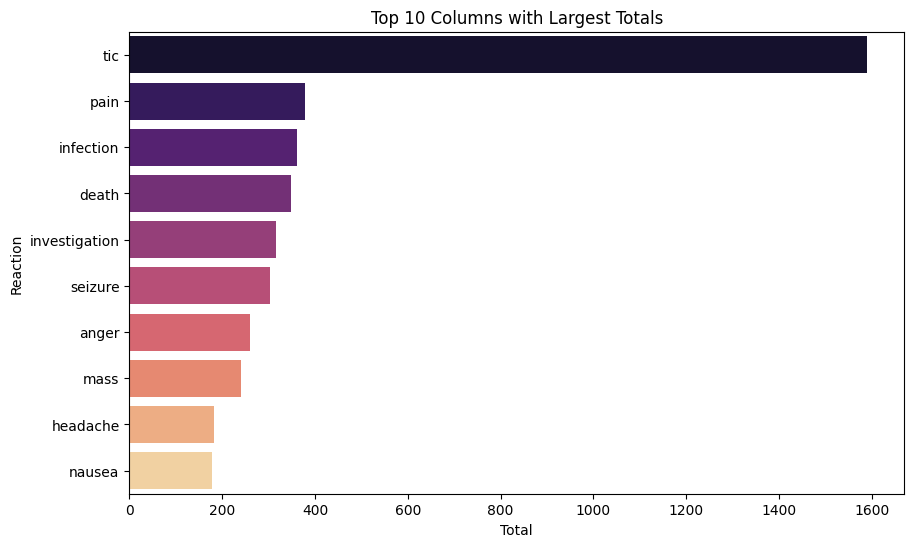

In [26]:
reaction_cols = documents_table.drop(columns=['doc_id','doc_type', 'year', 'drug', 'all_reactions']).sum()
top_reactions = reaction_cols.nlargest(10)


# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reactions.values, y=top_reactions.index, palette='magma')
plt.title('Top 10 Columns with Largest Totals')
plt.xlabel('Total')
plt.ylabel('Reaction')
plt.show()

In [ ]:
documents_table.head()

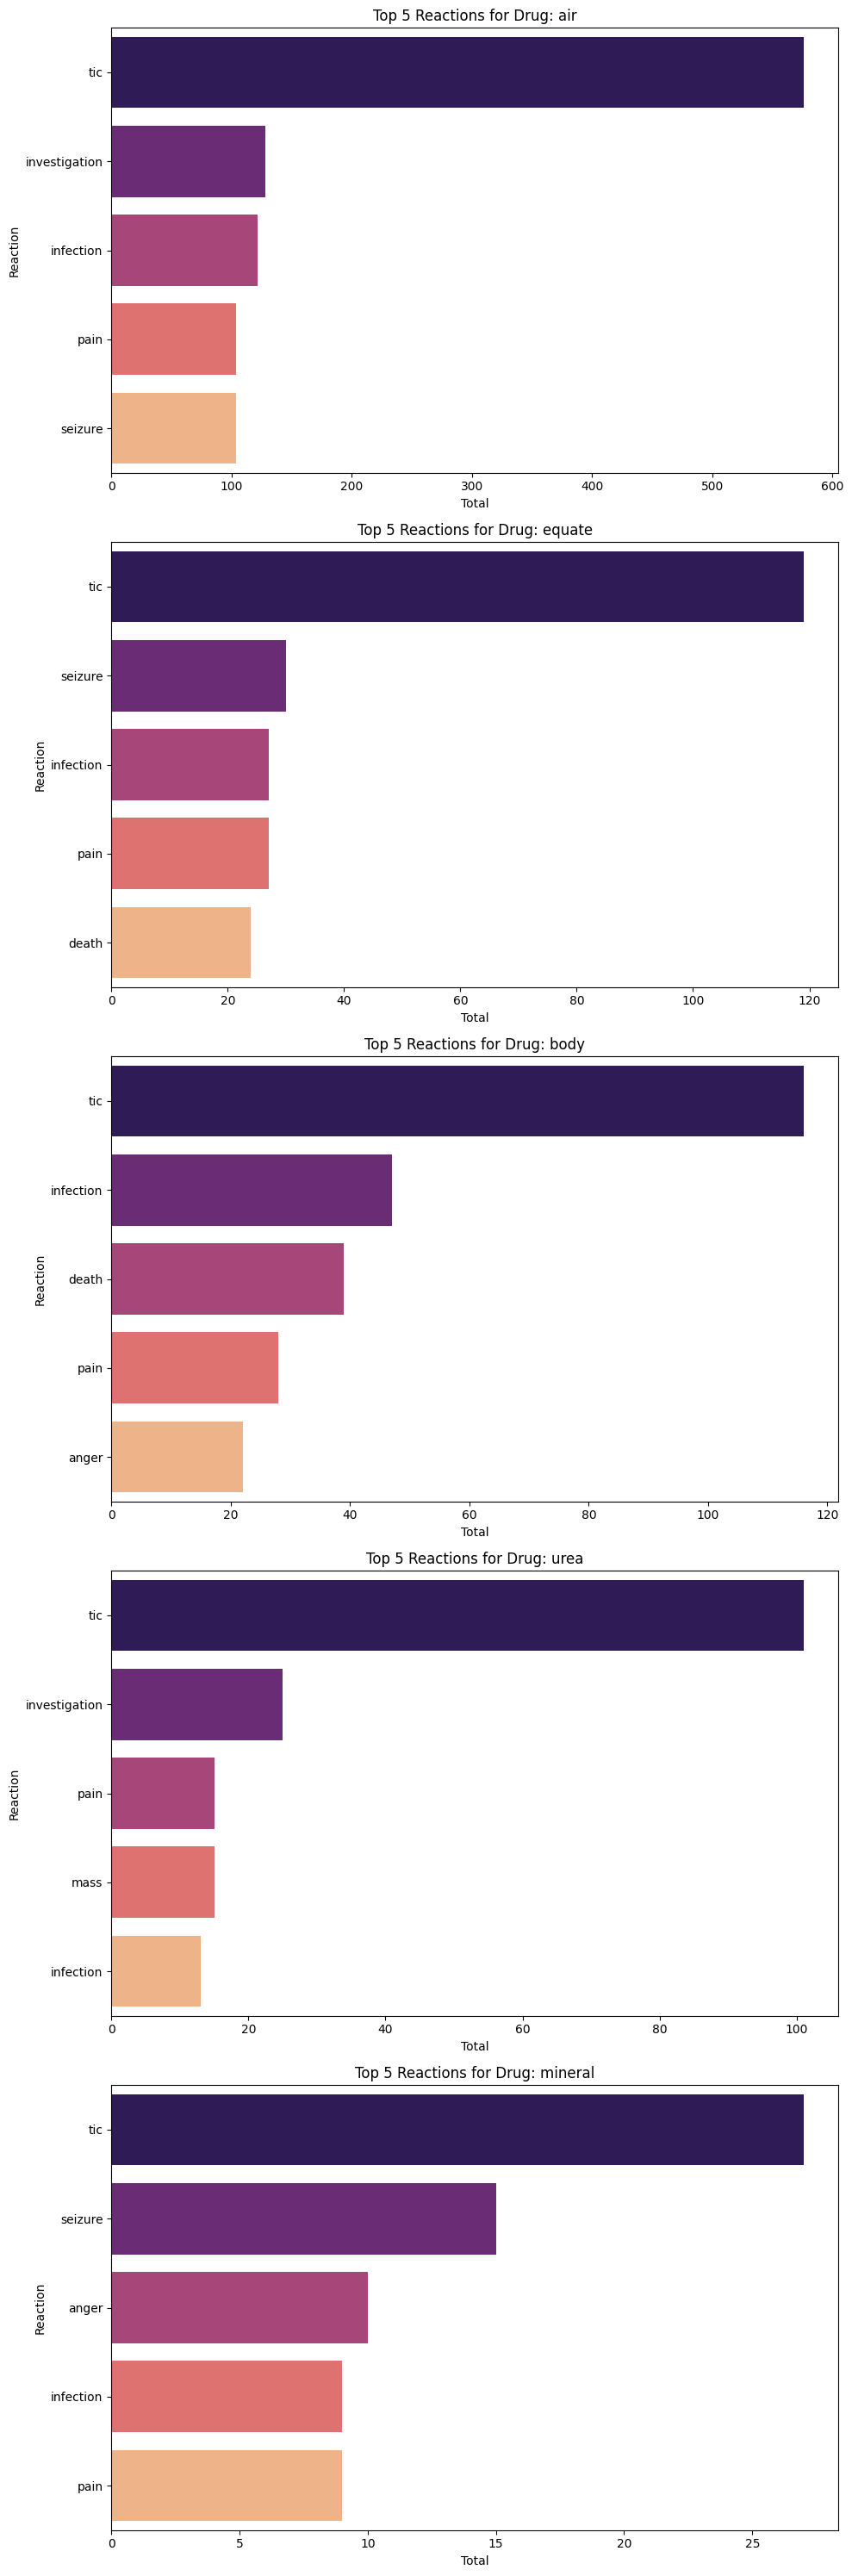

In [31]:

# Step 2: Filter documents_table to include only top 5 drugs
filtered_table = documents_table[documents_table['drug'].isin(top_drugs)]

# Step 3: Calculate top 5 reactions for each top drug
top_reactions_per_drug = {}
for drug in top_drugs:
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = documents_table.drop(columns=['doc_id', 'doc_type', 'year', 'drug', 'all_reactions']).sum()
    top_reactions = reaction_counts.nlargest(5).index.tolist()
    top_reactions_per_drug[drug] = top_reactions

# Step 4: Create subplots for each drug
num_drugs = len(top_drugs)
fig, axes = plt.subplots(num_drugs, 1, figsize=(10, 6*num_drugs))

for i, drug in enumerate(top_drugs):
    ax = axes[i]
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = drug_data.drop(columns=['doc_id', 'doc_type', 'year', 'drug','all_reactions']).sum()
    top_reactions = reaction_counts.nlargest(5)
    
    # Plotting
    sns.barplot(x=top_reactions.values, y=top_reactions.index, ax=ax, palette='magma')
    ax.set_title(f'Top 5 Reactions for Drug: {drug}')
    ax.set_xlabel('Total')
    ax.set_ylabel('Reaction')

plt.tight_layout()
plt.show()

# Reactions Table

## Outcome Variable

In [4]:
reactions = pd.read_csv('DataLibrary/reactions_table.csv')
reactions.head()

,patient_reaction_id,event_id,version_medDRA,outcome,reaction_processed
0,10,18,17.0,Recovered/resolved,['angioedema']
1,11,18,17.0,Recovered/resolved,"['laryngeal', 'oedema', 'laryngeal oedema']"
2,12,18,17.0,Recovered/resolved,"['face', 'oedema', 'face oedema']"
3,13,19,17.0,Fatal,"['tuberculosis', 'central', 'nervous', 'system..."
4,20,28,17.0,Recovered/resolved,"['respiratory', 'failure', 'respiratory failure']"


KeyError: -0.25

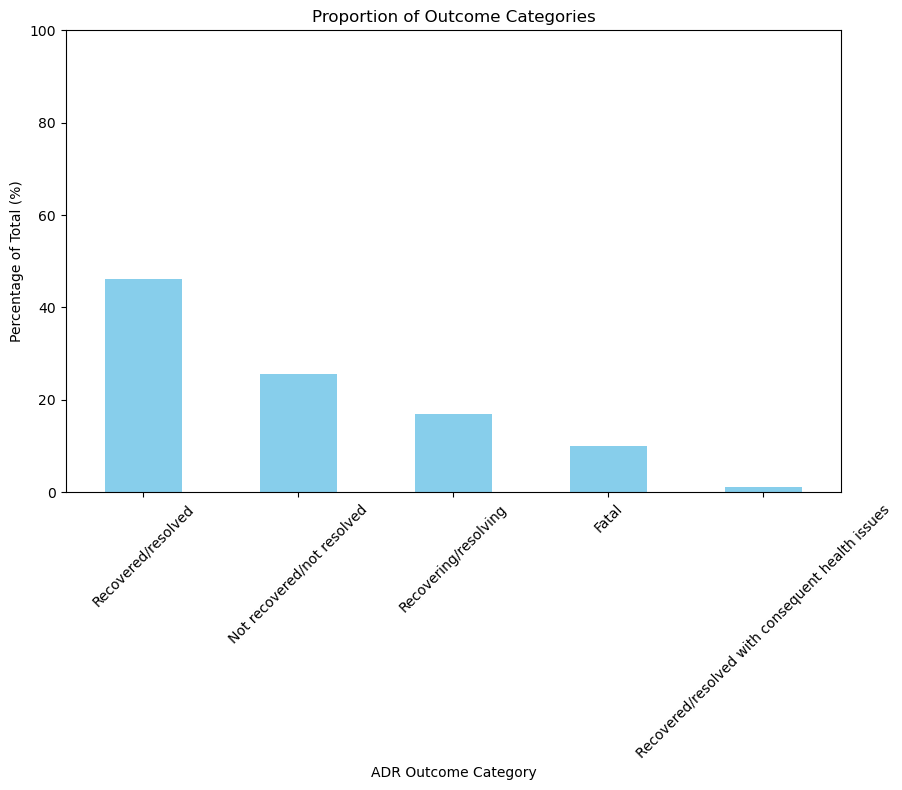

In [18]:
# Count the frequency of each category
category_counts = reactions['outcome'].value_counts()

# Calculate the percentages
total = len(reactions)
percentages = (category_counts / total) * 100

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Outcome Categories')
plt.xlabel('ADR Outcome Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Add labels to each bar
for bar in bars.containers[0]:
    height = bar.get_height()
    percentage = f'{height:.1f}%'
    frequency = category_counts[bar.get_x()].item()
    label = f'{percentage}\n({frequency})'
    bars.annotate(label,
                   (bar.get_x() + bar.get_width() / 2, height),
                   ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

### MeDRA Term Versions

### Processed Reaction Terms

In [ ]:
# descriptive text stat function

# Events Table

In [3]:
# Update to query 
events = pd.read_csv('DataLibrary/events_table.csv')
events.head()

,event_id,safetyreportid,event_date,serious,fulfillexpeditecriteria,report_source,safetyreportversion,country,patient.patientonsetage,sex,reaction,drug,company_name
0,1,5801206-7,2009-01-09,1,1,3,NaN,cn,26.0,1,[{'reactionmeddrapt': 'DRUG ADMINISTRATION ERR...,"[{'drugcharacterization': '1', 'medicinalprodu...",NaN
1,5,10003304,2014-12-12,0,2,1,2.0,us,NaN,2,"[{'reactionmeddraversionpt': '17.0', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...","['pfizer', 'inc']"
2,6,10003305,2014-10-02,0,2,1,1.0,us,48.0,2,"[{'reactionmeddraversionpt': '17.0', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...","['pfizer', 'inc']"
3,8,10003307,2015-11-25,0,2,1,3.0,us,65.0,2,"[{'reactionmeddraversionpt': '18.1', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...",['gilead']
4,9,10003308,2015-11-25,0,2,1,3.0,us,59.0,2,"[{'reactionmeddraversionpt': '18.1', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...",['gilead']


In [ ]:
events.shape

### Age

In [19]:
# Distribution of Age
plt.hist(events['age'].astype('float'))
ticks = np.arange(0, 100, 5)  # Customize this range as needed
plt.xticks(ticks)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

KeyError: 'age'

### Report Dates

### Seriousness of Report

### Expedited Criteria Status

### Report Source

### Company

### Country 

### Sex

# Labels Table

In [4]:
# Update to query 
labels = pd.read_csv('DataLibrary/labels_table.csv')
labels.head()

,label_id,ndc,rxcui,label_date,ingredients,warnings,drug_names,purpose
0,1,['15631-0404'],NaN,2021-09-02,"['silicea', 'sucrose', 'silicon', 'dioxide', '...",NaN,"['dioxide', 'silicon dioxide', 'silicon', 'sil...","['us', 'temporary', 'relief', 'acne', 'boil', ..."
1,2,NaN,NaN,2015-01-09,"['chantecaille', 'protection', 'naturelle', 'b...",NaN,NaN,"['purpose', 'sunscreen', 'purpose sunscreen']"
2,3,NaN,NaN,2023-08-02,"['mezereum', 'daphne', 'bark', 'sucrose', 'lac...",NaN,NaN,"['us', 'relieve', 'symptom', 'itching', 'us re..."
3,4,NaN,NaN,2023-09-05,"['ofloxacin', 'sodium', 'chloride', 'hydrochlo...","['immature animal', '1800 dosage', 'obstructio...",NaN,NaN
4,5,['50090-0481'],['198014'],2023-04-03,"['naproxen', 'croscarmellose', 'sodium', 'povi...",NaN,['naproxen'],NaN


### Label Dates

### Ingredient List

In [ ]:
# descriptive text stat function

### Warnings

In [ ]:
# descriptive text stat function

### Drug Names

In [ ]:
# descriptive text stat function

# Patient Drugs Table

In [5]:
# Update to query 
drugs = pd.read_csv('DataLibrary/drugs_table.csv')
drugs.head()

FileNotFoundError: [Errno 2] No such file or directory: 'DataLibrary/drugs_table.csv'

### Medicinal Product

In [ ]:
# descriptive text stat function

### Unique Ingredient Identifiers

### Drug Characterization

# Prices Table

In [6]:
# Update to query 
prices = pd.read_csv('DataLibrary/prices_table.csv')
prices.head()

,price_id,ndc,unit_price,price_date,generic_brand,generic_price,generic_date
0,1,24385005452,0.28255,2022-12-21,1,NaN,NaN
1,2,70000047501,0.28255,2022-12-21,1,NaN,NaN
2,3,46122038576,0.78326,2022-12-21,1,NaN,NaN
3,4,70000036201,0.15365,2022-12-21,1,NaN,NaN
4,5,70000036202,0.15365,2022-12-21,1,NaN,NaN


### National Average Cost per Unit

### Effective Price Dates

### Drug Type

# Combined Dataset from Master Query
## Analyzing Variable Interactions and Patterns

### All Numerical Variables

#### Correlation Martix

In [ ]:
# matrix

#### Age x. Outcome

#### Prices x. Outcome

#### Number of Manufacturers x. Outcome

### All Text Variables

In [17]:
# top token - naive bayes processing and/or tf-idf properties by outcome

### All Categorical Variables

#### Sex x. Outcome

#### Expedited Status x. Outcome

#### Report Source x. Outcome

#### Company Making Report x. Outcome

#### Country x. Outcome

#### Product Type x. Outcome

#### Manufacturer x. Outcome